In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel("Test_set.xlsx")

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
df = train_df.append(test_df)

In [6]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


#### Here we see that the features are complicated so a lot to be concentrated on feaure engineering

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [8]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

#### There is only one null value in Route and Total_stops , seems ok

In [9]:
df.Date_of_Journey.str.split("/").str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [10]:
df['date'] = df["Date_of_Journey"].str.split('/').str[0]
df['month'] = df["Date_of_Journey"].str.split('/').str[1]
df['year'] = df["Date_of_Journey"].str.split('/').str[2]


In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [12]:
##dd= []
##for x in  df["Date_of_Journey"]:
    ##dd.append(x.split('/')[0])
##so we can aslo use lamda function

In [13]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  date             13354 non-null  object 
 11  month            13354 non-null  object 
 12  year             13354 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.4+ MB


#### Convert the data , month, year fieds into integer

In [15]:
df["date"] = df["date"].astype(int)
df["month"] = df["month"].astype(int)
df["year"] = df["year"].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  date             13354 non-null  int32  
 11  month            13354 non-null  int32  
 12  year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 1.3+ MB


In [17]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'date', 'month',
       'year'],
      dtype='object')

In [18]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


#### Now we deal with arrival & depature time

Since we have day,month  fields we don't need date & month in arrival time 

In [19]:
df.Arrival_Time.str.split(" ").str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [20]:
df.Arrival_Time = df.Arrival_Time.str.split(" ").str[0]

In [21]:
df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [22]:
df['Arrival_hour'] = df["Arrival_Time"].str.split(":").str[0]
df['Arrival_min'] = df["Arrival_Time"].str.split(":").str[1]

In [23]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10


In [24]:
df["Arrival_hour"] = df["Arrival_hour"].astype(int)
df["Arrival_min"] = df["Arrival_min"].astype(int)

In [25]:
df['Dep_hour'] = df["Dep_Time"].str.split(":").str[0]
df['Dep_min'] = df["Dep_Time"].str.split(":").str[1]
df["Dep_hour"] = df["Dep_hour"].astype(int)
df["Dep_min"] = df["Dep_min"].astype(int)

In [26]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [27]:
df.drop(["Arrival_Time","Dep_Time"],axis=1,inplace=True)

In [28]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50


# Now lets deal with Route & Total_stops

In [29]:
df[["Route","Total_Stops"]]

,Route,Total_Stops
0,BLR → DEL,non-stop
1,CCU → IXR → BBI → BLR,2 stops
2,DEL → LKO → BOM → COK,2 stops
3,CCU → NAG → BLR,1 stop
4,BLR → NAG → DEL,1 stop
...,...,...
2666,CCU → DEL → BLR,1 stop
2667,CCU → BLR,non-stop
2668,DEL → BOM → COK,1 stop
2669,DEL → BOM → COK,1 stop


We can see that Route , Total_stops are co-related so we delete the Route column and convert the Total_Stops into numerical filed

In [30]:
df.drop("Route",axis=1,inplace=True)

In [31]:
df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [32]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

Here we can see we have empty value i.e nan

In [33]:
df["Total_Stops"].isnull().sum()

1

we have only one null value , we can delete the row or replace some realted value, here we gone delete the row

In [34]:
df[df["Total_Stops"].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [35]:
df.shape

(13354, 14)

In [36]:
df.iloc[9039]

Airline            Air India
Source                 Delhi
Destination           Cochin
Duration             23h 40m
Total_Stops              NaN
Additional_Info      No info
Price                   7480
date                       6
month                      5
year                    2019
Arrival_hour               9
Arrival_min               25
Dep_hour                   9
Dep_min                   45
Name: 9039, dtype: object

In [37]:
df.drop(9039,axis=0,inplace=True)
df.shape

(13353, 14)

In [38]:
df["Total_Stops"] = df["Total_Stops"].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3,  '4 stops':4})

In [39]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [40]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

# Duration

In [41]:
df["Duration_hour"] = df["Duration"].str.split(" ").str[0].str.split("h").str[0]

In [42]:
df["Duration_hour"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [43]:
df[df["Duration_hour"]=="5m"]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2,No info,NaN,12,3,2019,16,55,16,50,5m


##### We see that in above hour unique values we have "5m" value which says duration is 5minutes , which is not valid because time duration between two cities (Mumbai-Hyderabad ) couldn't be 5mins , so we delete the row time duration with "5m"

To drop we can use row index values

In [44]:
df.drop([6474,2660],axis=0,inplace=True)

In [45]:
df[df["Duration_hour"]=="5m"]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour


Now converting hours to mins

In [46]:
df["Duration_hour"] = df["Duration_hour"].astype("int")

In [47]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4


In [48]:
df["Duration_mins"] = df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [49]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [50]:
df["Duration_mins"].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

we can see that value without mins are stored as nan values i.e null values so we can fill nan values with 0 mins

In [51]:
df["Duration_mins"].isnull().sum()

1283

In [52]:
df["Duration_mins"] = df["Duration_mins"].fillna(0)

In [53]:
df.drop("Duration",axis=1,inplace=True)

In [54]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [55]:
df["Duration_mins"] = df["Duration_mins"].astype("int")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Total_Stops      13350 non-null  int64  
 4   Additional_Info  13350 non-null  object 
 5   Price            10680 non-null  float64
 6   date             13350 non-null  int32  
 7   month            13350 non-null  int32  
 8   year             13350 non-null  int32  
 9   Arrival_hour     13350 non-null  int32  
 10  Arrival_min      13350 non-null  int32  
 11  Dep_hour         13350 non-null  int32  
 12  Dep_min          13350 non-null  int32  
 13  Duration_hour    13350 non-null  int32  
 14  Duration_mins    13350 non-null  int32  
dtypes: float64(1), int32(9), int64(1), object(4)
memory usage: 1.2+ MB


Lets convert all the time into mins

In [57]:
df["Duration_hour"] = df["Duration_hour"]*60 
df["Total_duration"] = df["Duration_hour"] + df["Duration_mins"]

In [58]:
df.drop(["Duration_hour","Duration_mins"],axis=1,inplace=True)

In [59]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Total_duration
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,285


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Total_Stops      13350 non-null  int64  
 4   Additional_Info  13350 non-null  object 
 5   Price            10680 non-null  float64
 6   date             13350 non-null  int32  
 7   month            13350 non-null  int32  
 8   year             13350 non-null  int32  
 9   Arrival_hour     13350 non-null  int32  
 10  Arrival_min      13350 non-null  int32  
 11  Dep_hour         13350 non-null  int32  
 12  Dep_min          13350 non-null  int32  
 13  Total_duration   13350 non-null  int32  
dtypes: float64(1), int32(8), int64(1), object(4)
memory usage: 1.1+ MB


# Airline

In [61]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [63]:
df["Airline"]=le.fit_transform(df["Airline"])

In [64]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Total_duration
0,3,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,170
1,1,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,445
2,4,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,1140
3,3,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,325
4,3,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,285


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  int32  
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Total_Stops      13350 non-null  int64  
 4   Additional_Info  13350 non-null  object 
 5   Price            10680 non-null  float64
 6   date             13350 non-null  int32  
 7   month            13350 non-null  int32  
 8   year             13350 non-null  int32  
 9   Arrival_hour     13350 non-null  int32  
 10  Arrival_min      13350 non-null  int32  
 11  Dep_hour         13350 non-null  int32  
 12  Dep_min          13350 non-null  int32  
 13  Total_duration   13350 non-null  int32  
dtypes: float64(1), int32(9), int64(1), object(3)
memory usage: 1.1+ MB


In [66]:
df["Source"]=le.fit_transform(df["Source"])
df["Destination"]=le.fit_transform(df["Destination"])

In [67]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Total_duration
0,3,0,5,0,No info,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,2,No info,7662.0,1,5,2019,13,15,5,50,445
2,4,2,1,2,No info,13882.0,9,6,2019,4,25,9,25,1140
3,3,3,0,1,No info,6218.0,12,5,2019,23,30,18,5,325
4,3,0,5,1,No info,13302.0,1,3,2019,21,35,16,50,285


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  int32  
 1   Source           13350 non-null  int32  
 2   Destination      13350 non-null  int32  
 3   Total_Stops      13350 non-null  int64  
 4   Additional_Info  13350 non-null  object 
 5   Price            10680 non-null  float64
 6   date             13350 non-null  int32  
 7   month            13350 non-null  int32  
 8   year             13350 non-null  int32  
 9   Arrival_hour     13350 non-null  int32  
 10  Arrival_min      13350 non-null  int32  
 11  Dep_hour         13350 non-null  int32  
 12  Dep_min          13350 non-null  int32  
 13  Total_duration   13350 non-null  int32  
dtypes: float64(1), int32(11), int64(1), object(1)
memory usage: 990.8+ KB


In [69]:
df["Additional_Info"]=le.fit_transform(df["Additional_Info"])

In [70]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Total_duration
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,445
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,1140
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,325
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,285


In [74]:
df = pd.get_dummies(df,columns=["Airline","Source","Destination","Additional_Info"],drop_first=True)

In [75]:
df.columns

Index(['Total_Stops', 'Price', 'date', 'month', 'year', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Total_duration', 'Airline_1',
       'Airline_2', 'Airline_3', 'Airline_4', 'Airline_5', 'Airline_6',
       'Airline_7', 'Airline_8', 'Airline_9', 'Airline_10', 'Airline_11',
       'Source_1', 'Source_2', 'Source_3', 'Source_4', 'Destination_1',
       'Destination_2', 'Destination_3', 'Destination_4', 'Destination_5',
       'Additional_Info_1', 'Additional_Info_2', 'Additional_Info_3',
       'Additional_Info_4', 'Additional_Info_5', 'Additional_Info_6',
       'Additional_Info_7', 'Additional_Info_8', 'Additional_Info_9'],
      dtype='object')

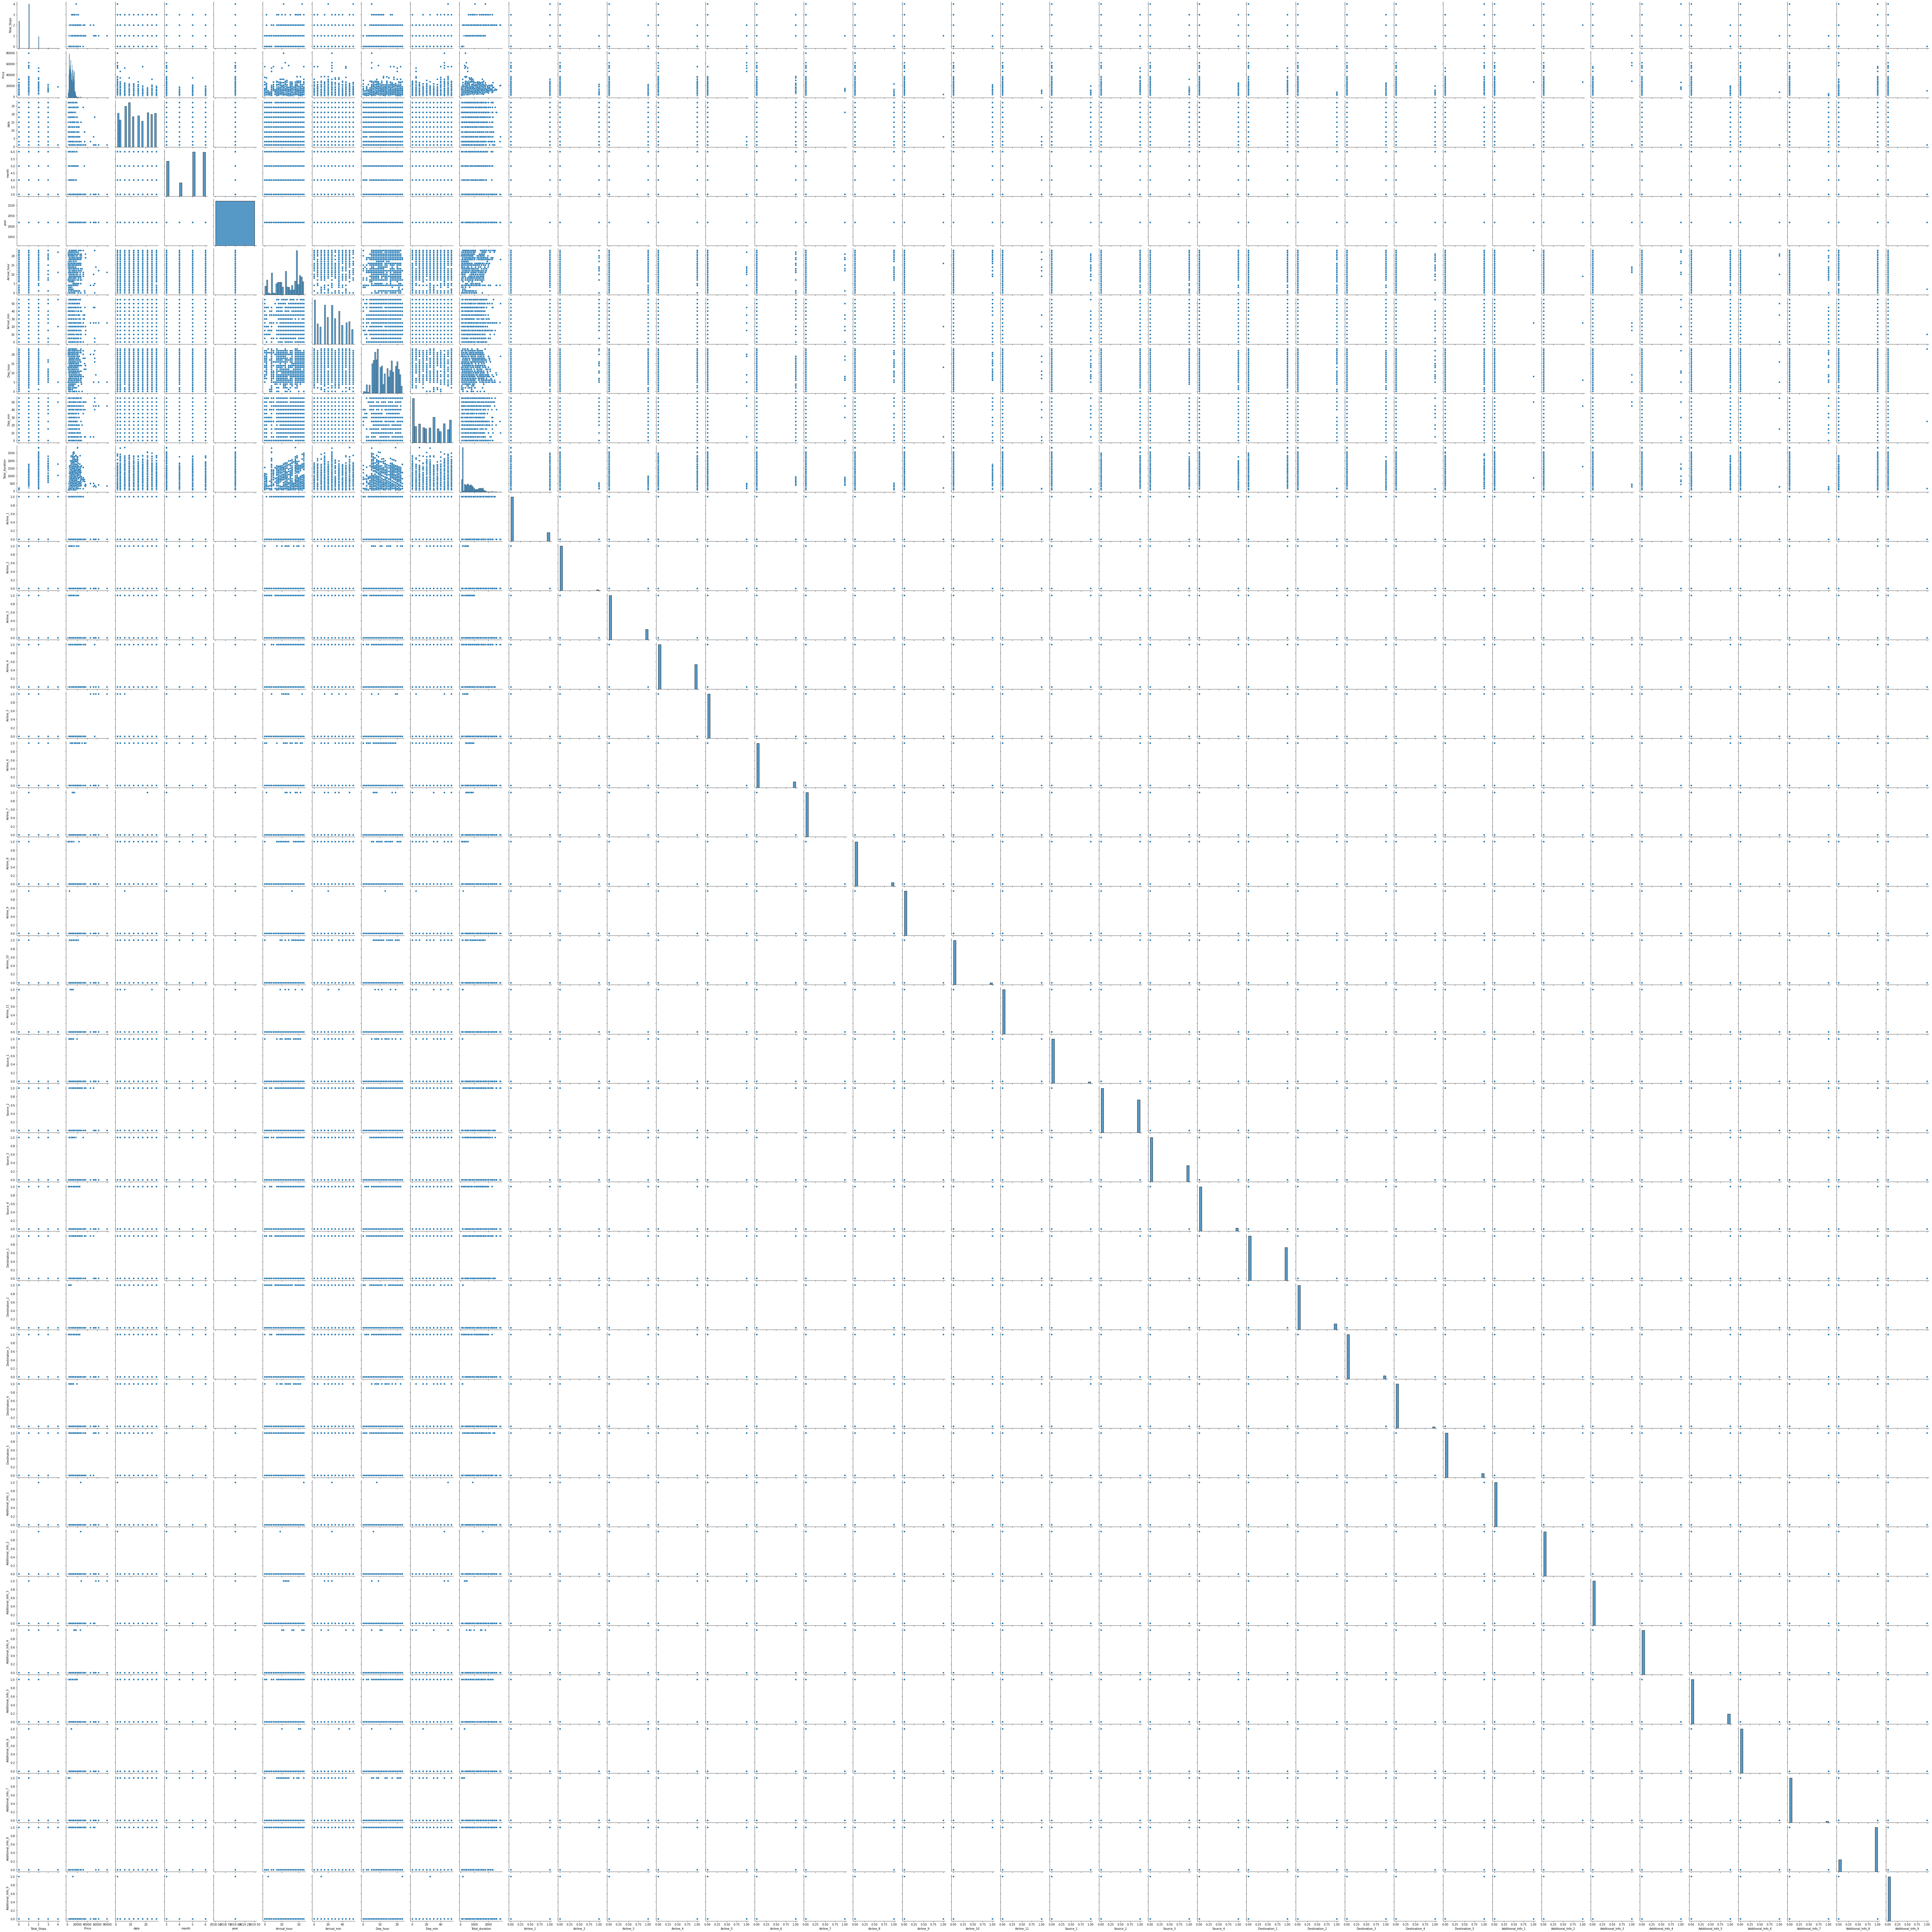

In [76]:
import seaborn as sns
sns.pairplot(df)